In [8]:
!wget https://github.com/Sasha-coder/NIS_Project/blob/main/Desktop/data.csv.zip
!unzip data.csv.zip

--2023-11-08 11:03:06--  https://github.com/Sasha-coder/NIS_Project/blob/main/Desktop/data.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4328 (4.2K) [text/plain]
Saving to: ‘data.csv.zip’

data.csv.zip        100%[===================>]   4.23K  --.-KB/s    in 0s      

2023-11-08 11:03:06 (62.7 MB/s) - ‘data.csv.zip’ saved [4328/4328]



In [1]:
# from google.colab import files
# uploaded = files.upload()

Saving data.csv.zip to data.csv.zip


In [2]:
# !unzip data.csv.zip

Archive:  data.csv.zip
  inflating: data.csv                


In [40]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

df = pd.read_csv("data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
X = df.drop('Bankrupt?', axis = 1)
Y = df[['Bankrupt?']]
rf_classifier.fit(X, Y)
#Get feature importances from the model
feature_importances = rf_classifier.feature_importances_
#Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
#Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#Display the sorted feature importances
feature_importance_df.head(21)

<ipython-input-41-32f407fd5117>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,Feature,Importance
29,Net Value Growth Rate,0.039896
18,Persistent EPS in the Last Four Seasons,0.029063
42,Net profit before tax/Paid-in capital,0.025408
39,Borrowing dependency,0.022707
22,Per Share Net profit before tax (Yuan ¥),0.021200
17,Net Value Per Share (C),0.019520
89,Net Income to Stockholder's Equity,0.018861
56,Cash/Total Assets,0.017544
91,Degree of Financial Leverage (DFL),0.016660
92,Interest Coverage Ratio (Interest expense to ...,0.016537


In [42]:
fig = px.bar(feature_importance_df, x='Feature', y='Importance', color='Importance',
             labels={'Feature': 'Features', 'Importance': 'Importance'},
             title='Feature importance according to Sklearn')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [43]:
X.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [44]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=SEED)

In [45]:
# Готовим данные. Тестируем обучение на данных, которые подобрал Sklearn.

x_train = X_train[list(feature_importance_df.Feature)[:15]]
x_test = X_test[list(feature_importance_df.Feature)[:15]]
x_train

,Net Value Growth Rate,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Borrowing dependency,Per Share Net profit before tax (Yuan ¥),Net Value Per Share (C),Net Income to Stockholder's Equity,Cash/Total Assets,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Total debt/Total net worth,Interest Expense Ratio,Interest-bearing debt interest rate,Equity to Liability,Non-industry income and expenditure/revenue
868,0.000484,0.238726,0.189209,0.371121,0.190329,0.190131,0.842560,0.155780,0.026808,0.565236,0.004928,0.630668,0.000205,0.036598,0.303566
305,0.000351,0.185402,0.147055,0.380006,0.147322,0.147444,0.831839,0.004111,0.026709,0.564734,0.014358,0.630323,0.000425,0.019442,0.303066
1849,0.000498,0.229366,0.179986,0.369637,0.180990,0.163246,0.842637,0.229441,0.026798,0.565191,0.000630,0.630632,0.000000,0.184781,0.303517
5676,0.000498,0.232107,0.183282,0.375110,0.184379,0.187013,0.841871,0.055206,0.026895,0.565608,0.007145,0.630937,0.000247,0.028566,0.303697
1988,0.000380,0.200340,0.157952,0.371094,0.158921,0.142767,0.834865,0.152174,0.026779,0.565102,0.006155,0.630574,0.000286,0.031455,0.303544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.000465,0.268413,0.223588,0.370452,0.224750,0.279339,0.842331,0.304580,0.026800,0.565198,0.001968,0.630646,0.000210,0.073707,0.303621
5191,0.000602,0.261605,0.207006,0.369773,0.211192,0.228098,0.843046,0.138588,0.026820,0.565293,0.003257,0.630706,0.000322,0.049579,0.303533
5226,0.000472,0.223977,0.176887,0.373375,0.177826,0.169736,0.841427,0.305572,0.026945,0.565800,0.006807,0.631088,0.000396,0.029459,0.303466
5390,0.000562,0.264347,0.212902,0.369637,0.217670,0.216763,0.843619,0.176930,0.026800,0.565200,0.002643,0.630643,0.000293,0.058283,0.303672


In [46]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Value Growth Rate,4091.0,3.299927e+05,2.110664e+07,0.000000,0.000442,0.000463,0.000500,1.350000e+09
Persistent EPS in the Last Four Seasons,4091.0,2.289879e-01,3.151015e-02,0.078567,0.214711,0.224827,0.239198,7.275220e-01
Net profit before tax/Paid-in capital,4091.0,1.827903e-01,2.814358e-02,0.052439,0.169550,0.178629,0.191524,6.978131e-01
Borrowing dependency,4091.0,3.746848e-01,1.500636e-02,0.187124,0.370142,0.372632,0.376313,1.000000e+00
Per Share Net profit before tax (Yuan ¥),4091.0,1.843869e-01,3.075301e-02,0.009114,0.170558,0.179785,0.193417,6.981246e-01
Net Value Per Share (C),4091.0,1.908748e-01,3.416529e-02,0.000000,0.173739,0.184653,0.199760,1.000000e+00
Net Income to Stockholder's Equity,4091.0,8.403895e-01,1.682198e-02,0.000000,0.840130,0.841201,0.842373,1.000000e+00
Cash/Total Assets,4091.0,1.268796e-01,1.417814e-01,0.000184,0.034073,0.078054,0.163426,1.000000e+00
Degree of Financial Leverage (DFL),4091.0,2.774700e-02,1.982425e-02,0.000000,0.026791,0.026808,0.026915,1.000000e+00
Interest Coverage Ratio (Interest expense to EBIT),4091.0,5.653073e-01,1.180684e-02,0.000000,0.565158,0.565255,0.565733,7.359584e-01


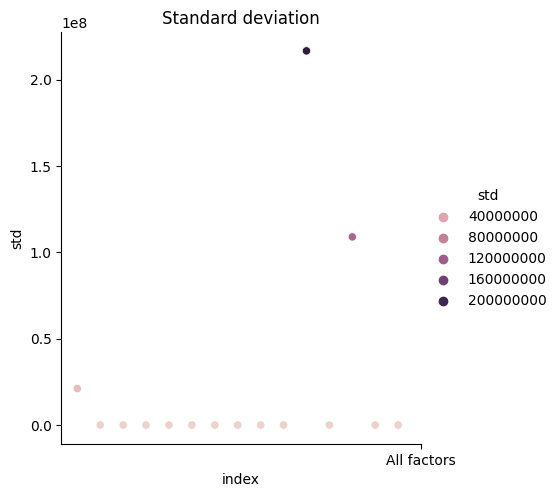

In [47]:
t = x_train.describe().T.reset_index()
description_x_train = x_train.describe()
plot = sns.relplot(data=t, x="index", y="std", hue='std')
plt.xticks('All factors')
plt.title("Standard deviation")
plt.show()

In [48]:
# Делаем данные более однородними, для более точных результатов.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
scaled_df = pd.DataFrame(x_train, columns=list(feature_importance_df.Feature)[:15])
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Value Growth Rate,4091.0,1.128948e-17,1.000122,-0.015636,-0.015636,-0.015636,-0.015636,63.953108
Persistent EPS in the Last Four Seasons,4091.0,-7.520533e-16,1.000122,-4.774321,-0.453139,-0.132052,0.324073,15.823313
Net profit before tax/Paid-in capital,4091.0,2.796318e-16,1.000122,-4.632200,-0.470518,-0.147874,0.310367,18.302069
Borrowing dependency,4091.0,2.676476e-15,1.000122,-12.500278,-0.302790,-0.136801,0.108531,41.675117
Per Share Net profit before tax (Yuan ¥),4091.0,-7.385928e-16,1.000122,-5.700088,-0.449729,-0.149673,0.293674,16.707323
Net Value Per Share (C),4091.0,-5.701189e-16,1.000122,-5.587489,-0.501618,-0.182132,0.260091,23.685564
Net Income to Stockholder's Equity,4091.0,1.003896e-15,1.000122,-49.963918,-0.015446,0.048226,0.117940,9.489367
Cash/Total Assets,4091.0,-1.085527e-16,1.000122,-0.893706,-0.654654,-0.344413,0.257801,6.158967
Degree of Financial Leverage (DFL),4091.0,3.126319e-17,1.000122,-1.399821,-0.048222,-0.047375,-0.041993,49.049622
Interest Coverage Ratio (Interest expense to EBIT),4091.0,-4.237898e-15,1.000122,-47.885480,-0.012612,-0.004466,0.036039,14.455346


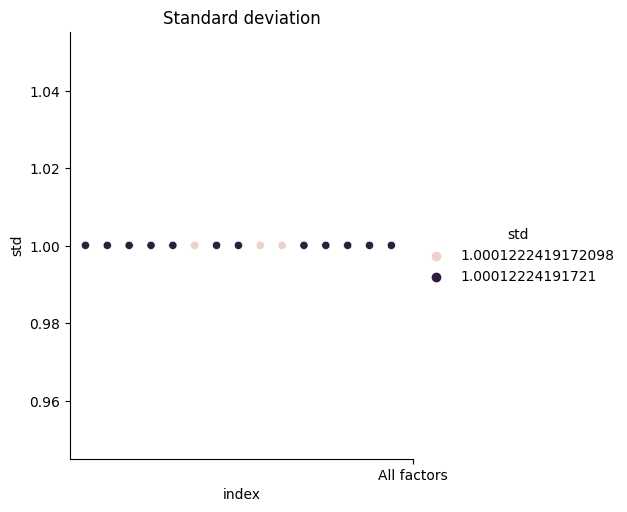

In [54]:
t = scaled_df.describe().T.reset_index()
description_scaled_df = scaled_df.describe()
sns.relplot(data=t, x="index", y="std", hue='std')
plt.title("Standard deviation")
plt.xticks('All factors')
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.045747800586510255
mse: 0.023814149560117303
rmse: 0.15431833837920012


In [75]:
# Также воспользуемся метрикой R^2, которая объясняет, какой процент данных наш алгоритм правильно
regressor.score(x_test, y_test)

0.2614629511557839

Text(0, 0.5, 'Mean Absolute Error')

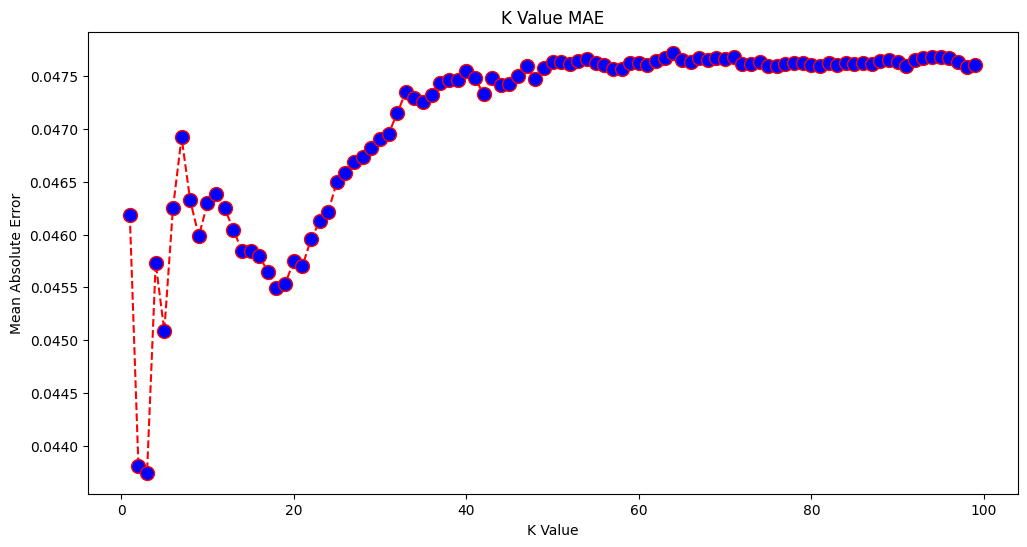

In [69]:
# Посмотрим, как меняется mae при разных значениях k (кол-во соседей)
error = []

for i in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')